In [1]:
'''Importing Packages'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
#from keras.utils import to_categorical
#import xgboost

In [2]:
#X = np.load('X.npy')

In [3]:
#y = np.load('Y.npy')

In [4]:
# X=np.array(X).reshape(-1,64,64, 1)
# X = X.astype('float32')
# X = X / 255.

In [5]:
# img = cv2.imread('water_coins.jpg')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [6]:
'''Importing Files'''
import os 
import glob
os.chdir('C:\\Users\\Ron\\Desktop\\ML_proj\\Brain_cancer\\data')
files=glob.glob('*.mat')

In [7]:
'''Reading .mat files and extracting numpy arrays of images'''
import h5py
import cv2 
X=[]
X_res = []
mask = []
Y=[]
data=[]
count=0
#a = 1
for file in files:
    with h5py.File(file,'r') as f:
        variables=f.items()
        for var in variables:
            name= var[0]
            data=var[1]
            if (np.array(data['image']).shape[1] == 256):
                count+=1
                #print 
                (count)
            else:
                d=data['image']
                m = data['tumorMask']
                X_res.append(cv2.resize(np.array(d),dsize=(64,64),interpolation=cv2.INTER_AREA))
                mask.append(np.array(m))
                X.append(np.array(d))
                #X.append(np.array(data['tumorMask']))
                Y.append(data['label'][0][0])
                
                #a = data['label'][0][0]
                

In [8]:
'''Image Pre-processing'''
X = np.array(X)
X_res = np.array(X_res)
mask = np.array(mask)

In [9]:
a = X.astype(np.uint16)
a_res = X_res.astype(np.uint16)
#a_mask = mask.astype(np.uint16)

In [10]:
# temp = (X[0]-X.min())/(X.max()-X.min())
# temp.dtype

In [11]:
'''Sample data'''
i = a[1]
b = (i/256).astype(np.uint8)

i_res = a_res[1]
b_res = (i_res/256).astype(np.uint8)

i_mask = mask[1]
b_mask = (i_mask/256).astype(np.uint8)

In [12]:
#c = (b/255).astype('float')

In [13]:
'''Removing Noise'''
blur = cv2.GaussianBlur(b, (5, 5),0)
blur_res = cv2.GaussianBlur(b_res, (5, 5),0)
blur_mask = cv2.GaussianBlur(b_mask, (5, 5),0)

In [14]:
from skimage.morphology import watershed
import scipy.ndimage as ndimage

In [15]:
"""Setting Thresholds"""

new_data=blur_res
ma_data=np.ma.masked_where(new_data<=3,new_data)
try_data=ma_data.astype(np.uint8)  

## Building threshold
tmp_data=ma_data.filled(0)
tmp_data[np.where(tmp_data!=0)]=255
bw_data=tmp_data.astype(np.uint8)

## Building markers
ma_conv=np.ma.masked_where(new_data<=5,new_data)
tmp_conv=ma_conv.filled(0)
tmp_conv[np.where(tmp_conv!=0)]=255
bw_conv=tmp_conv.astype(np.uint8)
markers = ndimage.label(bw_conv)[0]

## Watershed
labels = watershed(-try_data, markers, mask=bw_data)

([], <a list of 0 Text yticklabel objects>)

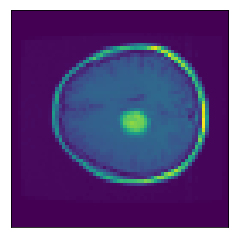

In [16]:
'''Original Image'''
plt.imshow(i_res)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

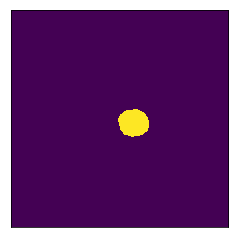

In [17]:
'''Original Manual Mask'''
plt.imshow(mask[1])
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

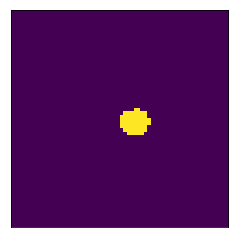

In [18]:
'''Extracted Mask'''
plt.imshow(labels)
plt.xticks([])
plt.yticks([])